# Bitcoin data analysis
## Yepeng Ding
### 12/13/2019

### Import libraries

In [287]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.tsa.api as smt

### Import data

In [288]:
data = pd.read_csv('./data/BTC_USD_2013-10-01_2019-12-15-CoinDesk.csv')
data_date = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data_cp = data['Closing Price (USD)']
data_size = len(data_cp)
print(data_cp.describe())

count     2257.000000
mean      3207.038487
std       3781.376050
min        108.584830
25%        421.424000
50%        805.796250
75%       6280.310107
max      19166.978740
Name: Closing Price (USD), dtype: float64


### Plot daily index

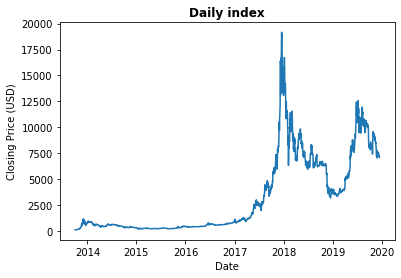

In [289]:
plt.title("Daily index", weight='bold')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.plot(data_date, data_cp)
plt.show()

### Calculate price return

In [290]:
price_return = data_cp.pct_change().dropna()
print(price_return.describe())
print('Skewness', stats.skew(price_return))
print('Kurtosis', stats.kurtosis(price_return))
print('Jarque–Bera test', stats.jarque_bera(price_return))

count    2256.000000
mean        0.002751
std         0.043725
min        -0.247595
25%        -0.013038
50%         0.001464
75%         0.019386
max         0.358493
Name: Closing Price (USD), dtype: float64
Skewness 0.22527488169104032
Kurtosis 6.562641905912875
Jarque–Bera test (4067.498804205579, 0.0)


### Plot price return

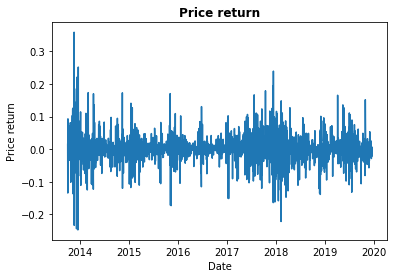

In [291]:
plt.title("Price return", weight='bold')
plt.xlabel('Date')
plt.ylabel('Price return')
plt.plot(data_date[1:], price_return)
plt.show()

### Calculate log return

In [292]:
log_return = pd.Series(np.diff(np.log(data_cp)))
print(log_return.describe())
print('Skewness', stats.skew(log_return))
print('Kurtosis', stats.kurtosis(log_return))
print('Jarque–Bera test', stats.jarque_bera(log_return))

count    2256.000000
mean        0.001795
std         0.043736
min        -0.284480
25%        -0.013123
50%         0.001463
75%         0.019200
max         0.306376
dtype: float64
Skewness -0.3192958063018781
Kurtosis 6.399724928806654
Jarque–Bera test (3888.2421707352564, 0.0)


### Plot log return

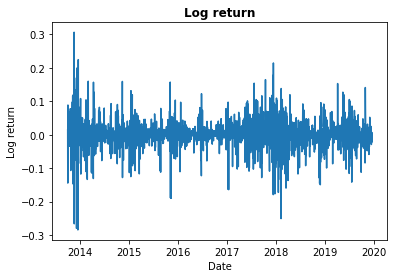

In [293]:
plt.title("Log return", weight='bold')
plt.xlabel('Date')
plt.ylabel('Log return')
plt.plot(data_date[1:], log_return)
plt.show()

### Calculate autocorrelation of log return

In [294]:
log_return_acf = pd.DataFrame(smt.stattools.acf(log_return,nlags=len(log_return)))
print(log_return_acf.describe())

                 0
count  2256.000000
mean      0.000222
std       0.026183
min      -0.064372
25%      -0.009374
50%      -0.000164
75%       0.008864
max       1.000000


### Plot autocorrelation of log return

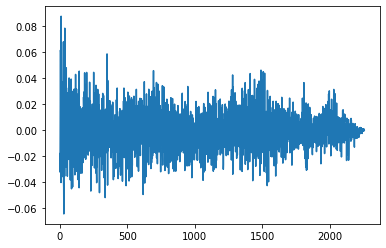

In [295]:
plt.plot(log_return_acf[1:])
plt.show()

### Calculate frequency of log return

In [296]:
# Adjust decimal point
precision = 3
log_return = pd.DataFrame(np.around(log_return, decimals=precision))

log_return_frequency = log_return[0].value_counts()

# Sort by the index
log_return_frequency.sort_index(inplace=True)

print(log_return_frequency.describe())

count    264.000000
mean       8.545455
std       11.698925
min        1.000000
25%        1.000000
50%        3.000000
75%       10.000000
max       55.000000
Name: 0, dtype: float64


### Plot frequency of log return

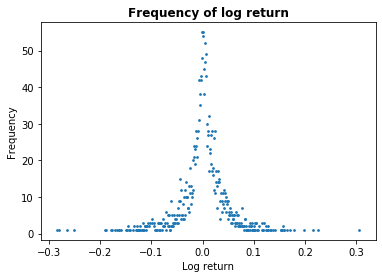

In [297]:
plt.title("Frequency of log return", weight='bold')
plt.xlabel('Log return')
plt.ylabel('Frequency')
plt.scatter(log_return_frequency.index, log_return_frequency, s=3)
plt.show()

### Calculate probability density of log return

In [298]:
log_return_pdf = log_return_frequency / sum(log_return_frequency)
print(log_return_pdf.describe())

count    264.000000
mean       0.003788
std        0.005186
min        0.000443
25%        0.000443
50%        0.001330
75%        0.004433
max        0.024379
Name: 0, dtype: float64


### Plot probability distribution of log return

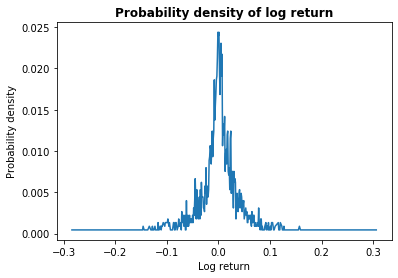

In [299]:
plt.title("Probability density of log return", weight='bold')
plt.xlabel('Log return')
plt.ylabel('Probability density')
plt.plot(log_return_pdf.index, log_return_pdf)
plt.show()

### Normalize probability density of log return

In [300]:
interval_length = 10 ** (-precision)
log_return_pdf_norm = log_return_pdf / sum(log_return_pdf * interval_length)
print(log_return_pdf_norm.describe())

count    264.000000
mean       3.787879
std        5.185694
min        0.443262
25%        0.443262
50%        1.329787
75%        4.432624
max       24.379433
Name: 0, dtype: float64


### Plot probability density normalization of log return

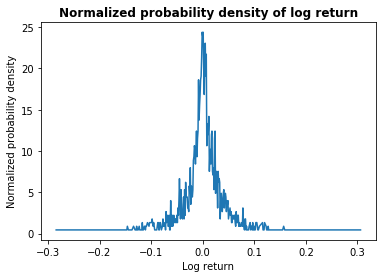

In [301]:
plt.title("Normalized probability density of log return", weight='bold')
plt.xlabel('Log return')
plt.ylabel('Normalized probability density')
plt.plot(log_return_pdf_norm.index, log_return_pdf_norm)
plt.show()
